In [11]:
import subprocess
import numpy as np
results = {"asym":{}, "waiter":{}, "pickboth":{}}
meals = 20
phil_numbers = [3,5,7,10]

tries=15

In [12]:
def get_test_time(type, phil_no, meals_no):
    res = subprocess.run(["/usr/bin/time",
               "-f\"%e\"",
               "node",
               "phil_implementation",
               type,
               str(phil_no),
               str(meals_no),
               "0"],stderr=subprocess.PIPE
            ).stderr.decode('utf-8')[1:-2]
    return float(res)


In [13]:
for type, result_dict in results.items():
    for phil_no in phil_numbers:
        if phil_no > 5 and type=="asym":
            continue
        print(type + str(phil_no), flush=True)
        result_dict[phil_no] = []
        tmp_list = result_dict[phil_no]
        for i in range(tries):
            tmp_list.append(get_test_time(type, phil_no, meals))
        result_dict[phil_no] = sum(tmp_list) / len(tmp_list)


asym3


asym5


waiter3


waiter5


waiter7


waiter10


pickboth3


pickboth5


pickboth7


pickboth10


In [5]:
def node_startup_time():
    res = subprocess.run(["/usr/bin/time",
               "-f\"%e\"",
               "node",
               "raw",
               ],stderr=subprocess.PIPE
            ).stderr.decode('utf-8')[1:-2]
    return float(res)

In [6]:
tmp_list= [node_startup_time() for i in range(tries)]
avg_node_startup = sum(tmp_list)/len(tmp_list)

In [7]:
import matplotlib.pylab as pylab
% pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)

labels = []
values = []

for type, res_dict in results.items():
    for phil_no, val in res_dict.items():
        labels.append("{}{}".format(type, phil_no))
        values.append(val)

labels = np.array(labels)
values = np.array([x - avg_node_startup for x in values])

np.save("labels", labels)
np.save("values", values)

Populating the interactive namespace from numpy and matplotlib


In [8]:
def display(eliminate=None):
    eliminate= [] if eliminate is None else eliminate
    labels = np.load("labels.npy")
    values = np.load("values.npy")
    indices = np.array([i for i in range(labels.size) if labels[i] not in eliminate])

    pylab.bar(indices,values[indices],align="center")
    pylab.xticks(indices,labels[indices])
    pylab.show()

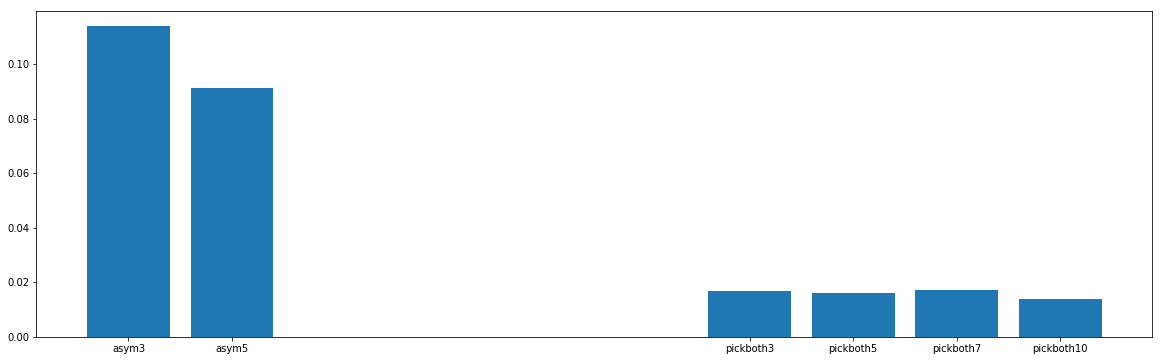

In [15]:
display()
# display([
#     "waiter10",
#     "waiter7",
#     "waiter5",
#     "waiter3"
# ])


Naive deadlockuje dla  philosopher_nr >= fork_nr

Asym deadlockuje dla philosopher_nr>fork_nr

Waiter rośnie gwałtownie ( wykładniczo pewnie przez timeout wykładniczy).  Eliminuje współbieżność

Podnoszenie dwóch widelców działa najlepiej.